In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Pull out common plotting settings:
from plot_params import get_plot_params
full_params, half_params = get_plot_params()
full_params['lines.linewidth'] = 1
plt.rcParams.update(full_params)

In [2]:
# Generate an example signal
fs = 5000
t_max = 1
n = int(fs*t_max)

# Build signal
t = np.linspace(0,t_max,n)
dt = t[1]-t[0]


# Define a time-dependent phase function
f_base = 350
df_1 = 10
tau_1 = 0.5
omega_1 = lambda x: f_base + (df_1)*(1-np.exp(-x/tau_1))
amp_1 = lambda x: 1 + 0.5*np.exp(-x/3)


omega_2 = lambda x: 80-2*x
amp_2 = lambda x: 8 - 0.5*np.exp(-x)


mu = lambda x: 1.5 + 2.5*np.exp(-x/(1.5))
#mu = lambda x: 2*x-0.3*x**2
#mu = lambda t: (0.2)*np.sin(t)

# Create data with time-dependent frequency
z_1 = lambda t: amp_1(t)*np.cos(2*np.pi*omega_1(t)*t)
z_2 = lambda t: amp_2(t)*np.cos(2*np.pi*omega_2(t)*t) 

z = z_1(t) 
z += z_2(t)
z += mu(t)
#z = z/np.std(z)


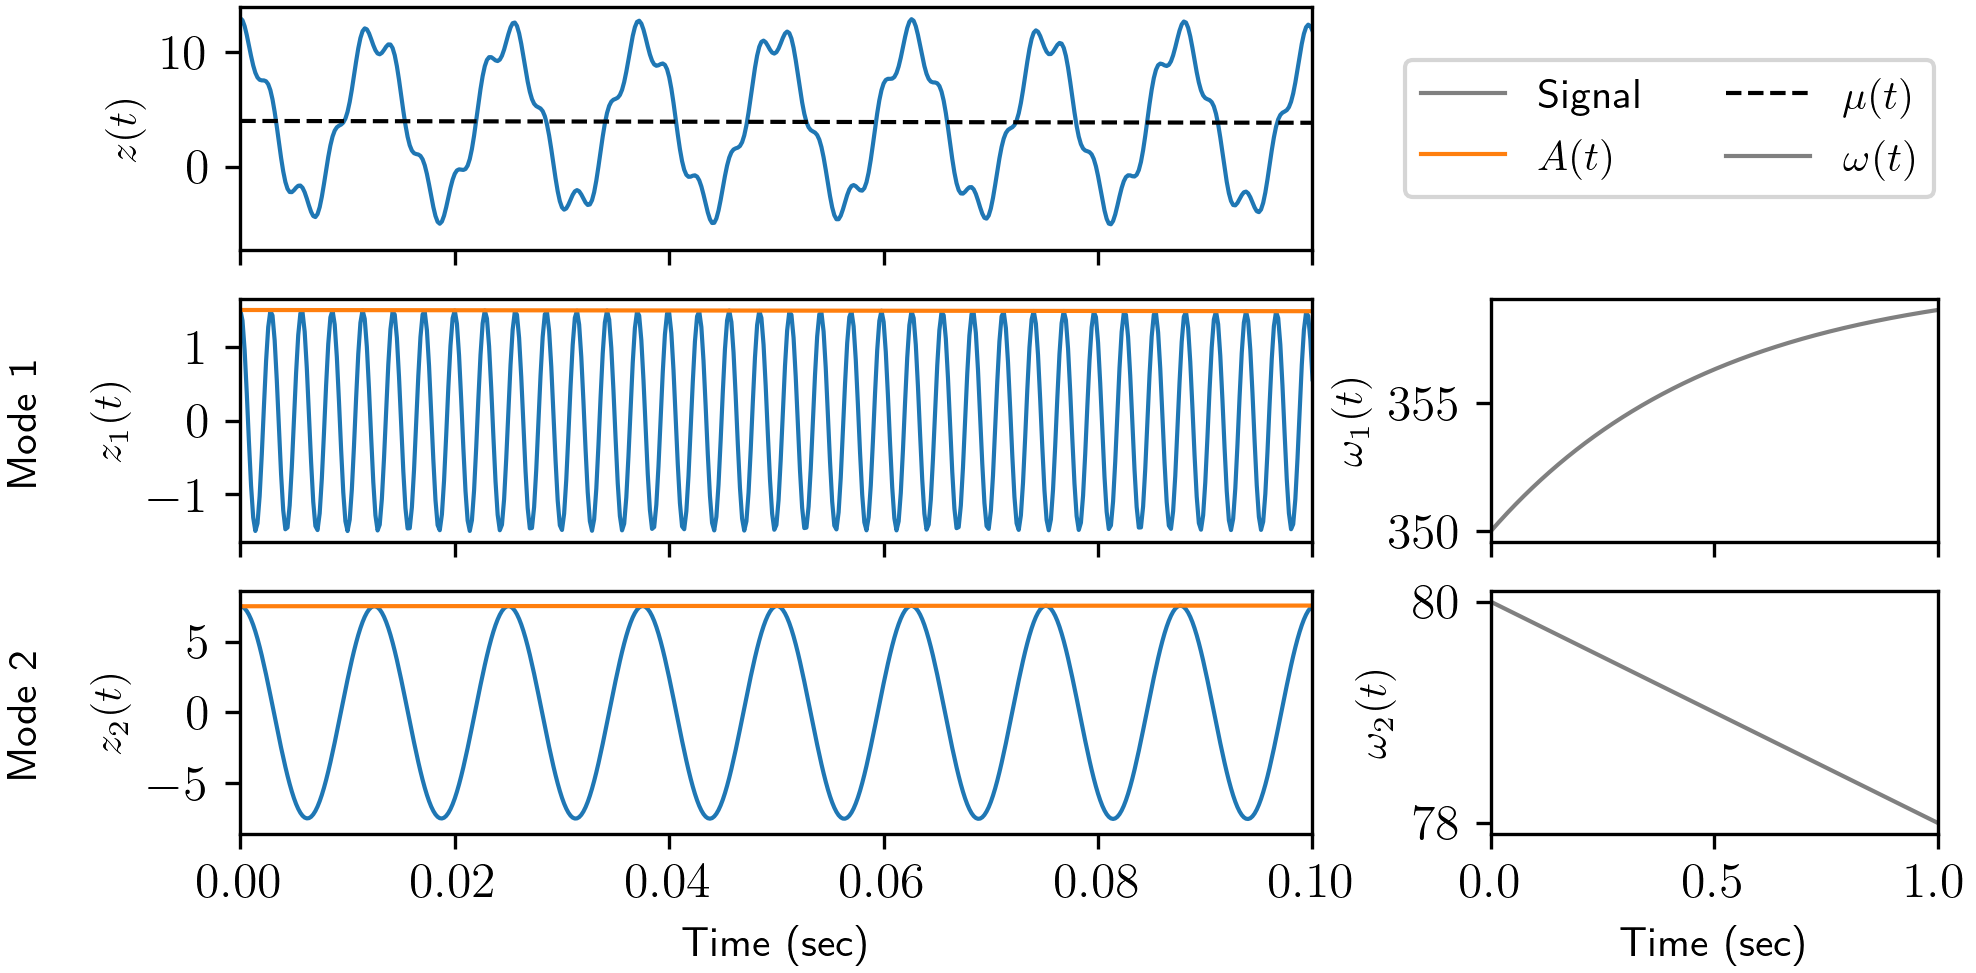

In [3]:
text_props = dict(rotation=90, horizontalalignment='center', verticalalignment='center')

fig3 = plt.figure()
gs = fig3.add_gridspec(3, 3)


#################################
## Axes 1 -- Top Row -- Signal ##
#################################
ax1 = fig3.add_subplot(gs[0, :2])
ax1.plot(t, z, label='Signal')
l3, = plt.plot(t, mu(t), '--k', label='Mean')
ax1.set_ylabel('$z(t)$')

################################
## Axes 2 -- 2nd Row - Mode 1 ##
################################
ax2 = fig3.add_subplot(gs[1, :2], sharex=ax1)
l1, = plt.plot(t, z_1(t))
l2, = plt.plot(t, amp_1(t))
ax2.set_ylabel('$z_1(t)$')

ax2a = fig3.add_subplot(gs[1, 2:])
l1, = plt.plot(t, omega_1(t), '-', color='grey')
ax2a.set_ylabel('$\omega_1(t)$')

################################
## Axes 2 -- 2nd Row - Mode 1 ##
################################
ax3 = fig3.add_subplot(gs[2, :2], sharex=ax1)
plt.plot(t, z_2(t))
plt.plot(t, amp_2(t))
ax3.set_ylabel('$z_2(t)$')
ax3.set_xlabel('Time (sec)')
ax3.set_xlim([0,0.1])

ax3a = fig3.add_subplot(gs[2, 2:], sharex=ax2a)
l4, = plt.plot(t, omega_2(t), '-', color='grey')
ax3a.set_ylabel('$\omega_2(t)$')
ax3a.set_xlabel('Time (sec)')
ax3a.set_xlim([0,1])

# Do some formatting of the shared axes, etc
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2a.get_xticklabels(), visible=False)

# Create the legend on top right axes
leg_ax = fig3.add_subplot(gs[0, 2:], frameon=False)
leg_ax.set_xticks([])
leg_ax.set_yticks([])
leg_ax.legend((l1, l2, l3, l4), 
           ('Signal', '$A(t)$', '$\mu(t)$', '$\omega(t)$'),
           ncol=2, bbox_to_anchor=(0.4,0.5), loc='center')

# Mode labels
plt.text(-0.2, 0.5, "Mode 1", transform=ax2.transAxes, **text_props)
plt.text(-0.2, 0.5, "Mode 2", transform=ax3.transAxes, **text_props)


#plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

plt.savefig("Fig3.png")

plt.show()